### Bistable wilson and cowan like model

from : https://elifesciences.org/articles/22425#fig5

In [2]:
# for fast array manipulation
import numpy as np
# for plotting
import matplotlib.pyplot as plt
# for numerical ODE integration
from scipy.integrate import odeint
# for nonlinear equations
from scipy.optimize import fsolve
# to display plots in-line
%matplotlib inline
plt.style.use('ggplot')

In [3]:
def sigmoid(x, a, thr):
    return 1 / (1 + np.exp(-a * (x - thr)))

def threshold_linear(x,thr,gain):
    thresholded = x-thr
    if thresholded > 0:
        return gain*thresholded
    else:
        return 0 

vthreshold_linear = np.vectorize(threshold_linear)

In [4]:
# Time constant of neural pop in seconds
tau_e = 0.010
tau_i = 0.002
tau_a = 0.5
# Synapse strength
j_ee = 5
j_ei = 1
j_ie = 10
j_ii = 0.5
# Adaptation parameter
beta = 6
tau_a = 0.5
# threshold and gains
g_e = 1
g_i = 4
thr_i = 25
thr_e = 3 # to play with
# Input currents
I_e = 6
# I_e-thr_e = 3 which is equivalent to taking I_e = 0 and thr_e = -3 as in the paper
plas_ie = 0.03
plas_ei = 0.3
exc_increase = 0.003
inhib_decay = 0.03
target_inhib = 10
target_exc = 4

In [5]:
print((target_inhib>5)*2)

2


In [6]:
# this function returns the right hand side of the Wilson-Cowan equation
# (both, in a 2-vector)
def rate_model(y, t):
    E = y[0]
    I = y[1]
    A = y[2]
    J_ie = y[3] 
    J_ei = y[4] 

    y1 = (-E + vthreshold_linear(j_ee*E-J_ei*I-A+I_e,thr_e, g_e))/tau_e
    y2 = (-I + vthreshold_linear(J_ie*E-j_ii*I,thr_i,g_i))/tau_i
    y3 = (-A + beta*E)/tau_a
    y4 = -(((I-target_inhib)>0)*E*plas_ie)+exc_increase
    y5 = (((E-target_exc)>0)*I*plas_ei)-inhib_decay

    return [y1, y2,y3, y4,y5]


In [7]:
# simulation duration and step size
time = np.linspace(0, 750, 40000)

# starting point, hopefully inside the basin of attraction of our attractor
E0, I0, A0, J_ei0, J_ie0 = 0, 0, 0, j_ei, j_ie # try changing this

# find the solution with scint.odeint
odesol = odeint(rate_model, [E0, I0, A0, J_ie0, J_ei0], time)
# separate the two solutions
exc_timeseries, inh_timeseries, a_timeseries, j_ie_timeseries, j_ei_timeseries = odesol.T

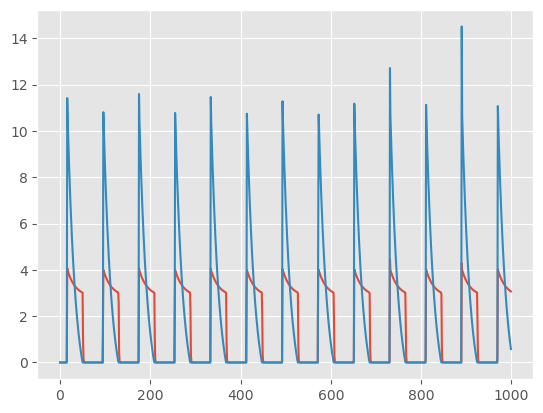

In [8]:
plt.plot(exc_timeseries[-1000:]);
plt.plot(inh_timeseries[-1000:]);

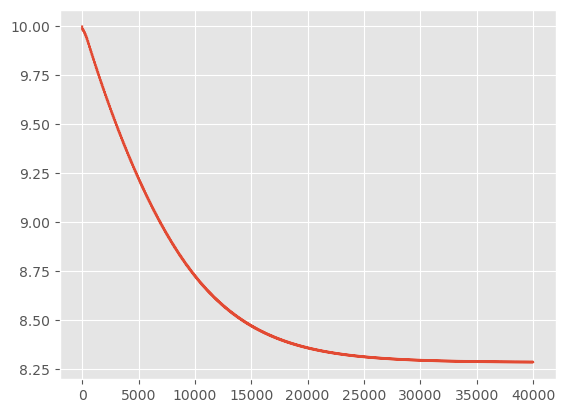

In [9]:
plt.plot(j_ie_timeseries)

In [10]:
# # plotting the vector field in the state space (E, I)
# plt.figure(figsize=(10, 10))
# #plt.quiver(x2[:,:,49], x1[:,:,49], X2[:,:,49], X1[:,:,49], pivot='mid', alpha=.5)
# plt.xlim([minval, maxval])
# plt.ylim([minval, maxval])
# plt.xlabel(r'$I$', fontsize=16) # yes, you can use Latex code!
# plt.ylabel(r'$E$', fontsize=16)
# plt.grid()

# # plot the solution in the state space
# plt.plot(inh_timeseries, exc_timeseries, '.-');

# # plot the fixed points we identified
# plt.scatter(fixed_p[1], fixed_p[0], marker='o', c='k', s=50,
#             label="Stationary points")

# # plot the starting point
# plt.scatter(I0, E0, marker='*', c='r', s=300, label="Starting point")
# plt.legend(loc="upper left")

# # plot the solution in time
# plt.figure(figsize=(10.3,3))
# plt.ylabel(r'$E, I$')
# plt.xlabel(r'$t$')
# plt.plot(time, exc_timeseries, '.-', label="excitatory");
# plt.plot(time, inh_timeseries, '.-', label="inhibitory");
# plt.legend();